<a href="https://colab.research.google.com/github/fbalsrud/ITB2022/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**주제: 혈청크레아티닌 수치 정상/비정상 분류**

 * 가입자일련번호 : 해당 가입자에 부여한 일련번호
 * 혈청크레아티닌 정상/비정상 : 타겟 변수 (2개의 class)
    * 0 (정상)
    * 1 (비정상)


In [55]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import mglearn

## 데이터 불러오기 및 탐색

In [58]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
health = pd.read_csv('https://raw.githubusercontent.com/fbalsrud/ITB2022/main/health_data.csv', index_col = '가입자일련번호')

print(health.columns)

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')


In [116]:
display(health.info())
display(health.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000 non-null  int64  
 11  수축기혈압        9912 non-null   float64
 12  이완기혈압        9912 non-null   float64
 13  식전혈당(공복혈당)   9912 non-null   float64
 14  총콜레스테롤       4044 non-null   float64
 15  트리글리세라이드     4044 non-null   float64
 16  HDL콜레스테롤     4044 non-null   float64
 17  LDL콜레스테롤     3977 non-null   float64
 18  혈색소          9912 non-null   float64
 19  요단백 

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


### 변수명 변경



In [117]:
# 변수명 변경
health = health.rename(columns={"가입자일련번호": "id"})

health = health.rename(columns={"기준년도": "HCHK_YEAR"})
health = health.rename(columns={"시도코드": "SIDO"})
health = health.rename(columns={"성별코드": "SEX"})
health = health.rename(columns={"연령대코드(5세단위)": "AGE_GROUP"})
health = health.rename(columns={"신장(5Cm단위)": "HEIGHT"})
health = health.rename(columns={"체중(5Kg 단위)": "WEIGHT"})
health = health.rename(columns={"허리둘레": "WAIST"})
health = health.rename(columns={"시력(좌)": "SIGHT_LEFT"})
health = health.rename(columns={"시력(우)": "SIGHT_RIGHT"})
health = health.rename(columns={"청력(좌)": "HEAR_LEFT"})
health = health.rename(columns={"청력(우)": "HEAR_RIGHT"})
health = health.rename(columns={"수축기혈압": "BP_HIGH"})
health = health.rename(columns={"이완기혈압": "BP_LWST"})
health = health.rename(columns={"식전혈당(공복혈당)": "BLDS"})
health = health.rename(columns={"총콜레스테롤": "TOT_CHOLE"})
health = health.rename(columns={"트리글리세라이드": "TRIGLYCERIDE"})
health = health.rename(columns={"HDL콜레스테롤": "HDL_CHOLE"})
health = health.rename(columns={"LDL콜레스테롤": "LDL_CHOLE"})
health = health.rename(columns={"혈색소": "HMG"})
health = health.rename(columns={"요단백": "OLIG_PROTE_CD"})
health = health.rename(columns={"혈청크레아티닌": "CREATININE"})
health = health.rename(columns={"(혈청지오티)AST": "SGOT_AST"})
health = health.rename(columns={"(혈청지오티)ALT": "SGPT_ALT"})
health = health.rename(columns={"감마지티피": "GAMMA_GTP"})
health = health.rename(columns={"흡연상태": "SMK"})
health = health.rename(columns={"음주여부": "DRK"})
health = health.rename(columns={"구강검진수검여부": "INSPEC"})
health = health.rename(columns={"치아우식증유무": "CRS_YN"})
health = health.rename(columns={"치석": "TTR_YN"})
health = health.rename(columns={"데이터공개일자": "DATA_STD"})

In [118]:
# 바뀐 변수명 확인
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HCHK_YEAR      10000 non-null  int64  
 1   SIDO           10000 non-null  int64  
 2   SEX            10000 non-null  object 
 3   AGE_GROUP      10000 non-null  int64  
 4   HEIGHT         10000 non-null  int64  
 5   WEIGHT         10000 non-null  int64  
 6   WAIST          10000 non-null  float64
 7   SIGHT_LEFT     10000 non-null  float64
 8   SIGHT_RIGHT    10000 non-null  float64
 9   HEAR_LEFT      10000 non-null  int64  
 10  HEAR_RIGHT     10000 non-null  int64  
 11  BP_HIGH        9912 non-null   float64
 12  BP_LWST        9912 non-null   float64
 13  BLDS           9912 non-null   float64
 14  TOT_CHOLE      4044 non-null   float64
 15  TRIGLYCERIDE   4044 non-null   float64
 16  HDL_CHOLE      4044 non-null   float64
 17  LDL_CHOLE      3977 non-null   float64
 18  HMG   

###데이터 전처리

In [119]:
# 결측치 제거
health = health.drop(['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','CRS_YN','TTR_YN'], axis=1)

# 불필요한 변수 제거
health = health.drop(['HCHK_YEAR', 'DATA_STD','SIDO', 'INSPEC'], axis=1)

# 결측행 제거
health.dropna(inplace=True, axis=0)

health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 1 to 10000
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEX            9858 non-null   object 
 1   AGE_GROUP      9858 non-null   int64  
 2   HEIGHT         9858 non-null   int64  
 3   WEIGHT         9858 non-null   int64  
 4   WAIST          9858 non-null   float64
 5   SIGHT_LEFT     9858 non-null   float64
 6   SIGHT_RIGHT    9858 non-null   float64
 7   HEAR_LEFT      9858 non-null   int64  
 8   HEAR_RIGHT     9858 non-null   int64  
 9   BP_HIGH        9858 non-null   float64
 10  BP_LWST        9858 non-null   float64
 11  BLDS           9858 non-null   float64
 12  HMG            9858 non-null   float64
 13  OLIG_PROTE_CD  9858 non-null   float64
 14  CREATININE     9858 non-null   float64
 15  SGOT_AST       9858 non-null   float64
 16  SGPT_ALT       9858 non-null   float64
 17  GAMMA_GTP      9858 non-null   float64
 18  SMK    

In [120]:
# object인 변수 척도 바꾸기(성별, 흡연상태, 음주여부)
health = pd.get_dummies(health)

display(health.head())

,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,...,SGOT_AST,SGPT_ALT,GAMMA_GTP,SEX_F,SEX_M,SMK_No,SMK_NotNow,SMK_Yes,DRK_No,DRK_Yes
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,21.0,27.0,21.0,0,1,1,0,0,1,0
2,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,18.0,15.0,15.0,1,0,1,0,0,1,0
3,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,27.0,25.0,7.0,1,0,1,0,0,1,0
4,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,65.0,97.0,72.0,0,1,1,0,0,1,0
5,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,18.0,17.0,14.0,1,0,1,0,0,1,0


### 파생변수 생성

In [121]:
# 혈청크레아티닌 정상치는 0.8~1.7mg/dL

def get_diagnosis(x):   # 혈청크레아티닌 수치가 정상 범위에 속하면 0, 그렇지 않으면 1을 반환하는 함수 정의
  if 0.8 <= x <= 1.7:
    return 0
  else:
    return 1

health['diagnosis'] = health['CREATININE'].apply(get_diagnosis)   # 새로운 column 'diagnosis' 생성
health['diagnosis']

가입자일련번호
1        0
2        1
3        1
4        0
5        1
        ..
9995     0
9996     1
9997     1
9998     0
10000    1
Name: diagnosis, Length: 9858, dtype: int64

In [122]:
# 전처리 결과 확인
display(health.head())
health.info()

,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,...,SGPT_ALT,GAMMA_GTP,SEX_F,SEX_M,SMK_No,SMK_NotNow,SMK_Yes,DRK_No,DRK_Yes,diagnosis
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,27.0,21.0,0,1,1,0,0,1,0,0
2,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,15.0,15.0,1,0,1,0,0,1,0,1
3,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,25.0,7.0,1,0,1,0,0,1,0,1
4,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,97.0,72.0,0,1,1,0,0,1,0,0
5,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,17.0,14.0,1,0,1,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 1 to 10000
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE_GROUP      9858 non-null   int64  
 1   HEIGHT         9858 non-null   int64  
 2   WEIGHT         9858 non-null   int64  
 3   WAIST          9858 non-null   float64
 4   SIGHT_LEFT     9858 non-null   float64
 5   SIGHT_RIGHT    9858 non-null   float64
 6   HEAR_LEFT      9858 non-null   int64  
 7   HEAR_RIGHT     9858 non-null   int64  
 8   BP_HIGH        9858 non-null   float64
 9   BP_LWST        9858 non-null   float64
 10  BLDS           9858 non-null   float64
 11  HMG            9858 non-null   float64
 12  OLIG_PROTE_CD  9858 non-null   float64
 13  CREATININE     9858 non-null   float64
 14  SGOT_AST       9858 non-null   float64
 15  SGPT_ALT       9858 non-null   float64
 16  GAMMA_GTP      9858 non-null   float64
 17  SEX_F          9858 non-null   uint8  
 18  SEX_M  

### 혈청크레아티닌 정상/비정상 여부 비율 확인

0    6283
1    3575
Name: diagnosis, dtype: int64


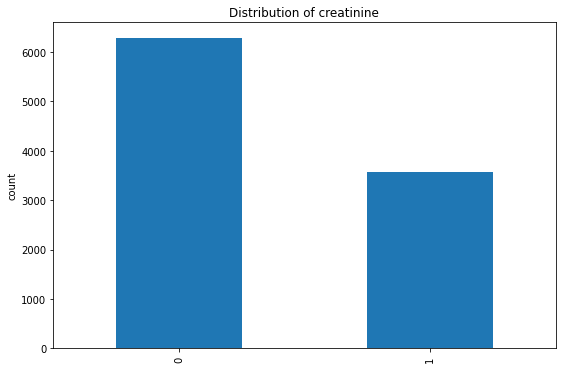

In [123]:
print(health['diagnosis'].value_counts())

health['diagnosis'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of creatinine')
plt.show()

##의사결정나무 만들기

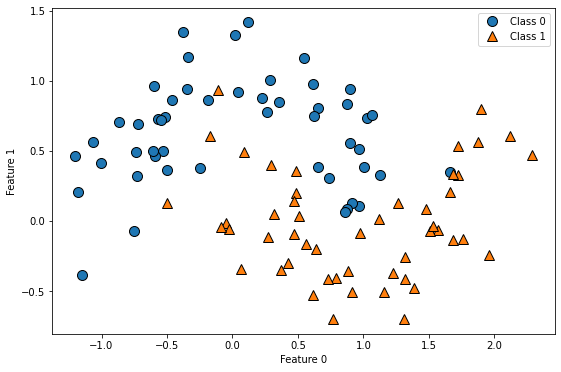

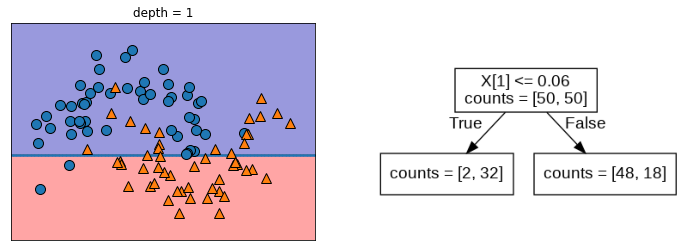

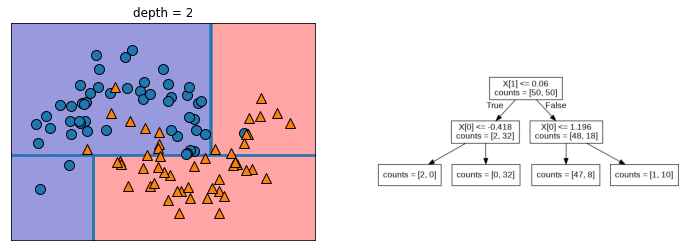

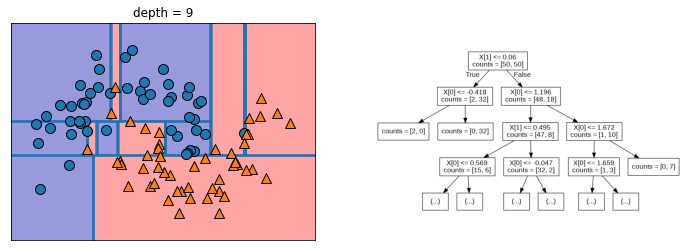

In [124]:
mglearn.plots.plot_tree_progressive()

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.drop(['diagnosis', 'CREATININE'], axis=1)  # 독립 변수
y = health['diagnosis']   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.654


In [145]:
# 의사결정나무의 깊이를 2로 제한했을 때 가장 높은 시험용 데이터 정확도를 보임.
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.757
시험용 데이터 정확도: 0.759


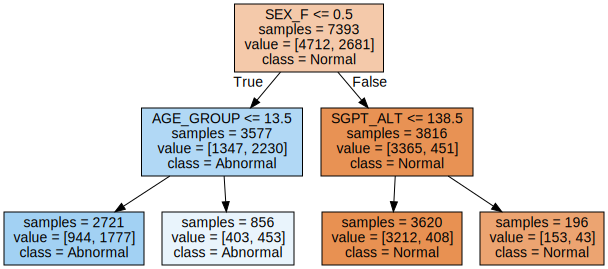

In [154]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "Normal", "Abnormal"],
                feature_names=health.columns[:23], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##랜덤포레스트 만들기

In [142]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.751


##그래디언트 부스팅 만들기

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [130]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.782
시험용 데이터 세트 정확도: 0.757


###그리드 서치
최적 파라미터 설정하기

In [131]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [132]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.756122,9,0.748479,0.762175,0.757711
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.756527,6,0.752130,0.760958,0.756494
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.752605,15,0.747262,0.759740,0.750812
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.756663,5,0.748884,0.764610,0.756494
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.755715,11,0.751724,0.759334,0.756088
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.755174,13,0.751318,0.758523,0.755682
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.757069,1,0.748884,0.765422,0.756899
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.756392,7,0.750101,0.762987,0.756088
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.755850,10,0.754158,0.761769,0.751623
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.756798,2,0.748884,0.764610,0.756899


In [133]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.7571


In [134]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.759


##분류 모델 평가

###교차검증 정확도 비교
- 혈청크레아티닌과 같이 건강 지표는 오분류 했을 때의 비용이 크므로 오분류율을 줄이고 정확도를 높이는 것이 바람직한 분류 목적이다.
- 정확도를 평가방법으로 라인그래프 비교한 결과, 10번의 교차 검증 모두에서 대체로 그래디언드 부스팅의 정확도가 더욱 높다.

In [146]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')  
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores)  
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.74324324 0.7527027  0.75945946 0.73342355 0.7631935  0.76589986
 0.76184032 0.77401894 0.76184032 0.75101488]
Random forest:  [0.74594595 0.7472973  0.7472973  0.72665765 0.75913396 0.76048714
 0.73748309 0.77943166 0.7564276  0.73207037]
Gradient boosting:  [0.75405405 0.75135135 0.75945946 0.73342355 0.77537212 0.76454668
 0.75236806 0.77807848 0.76048714 0.75372124]
Accuracy mean
Decision tree :0.757
Random forest :0.749
Gradient boosting :0.758


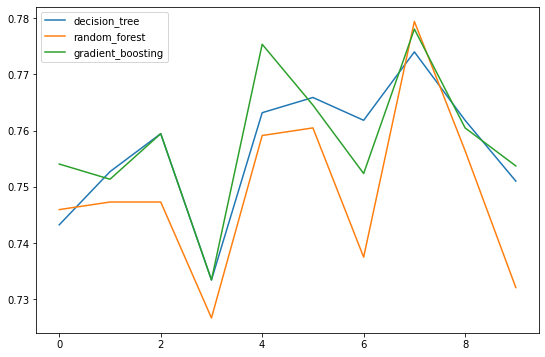

In [147]:
#정확도 평가 결과 시각화
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient_boosting',gbrt_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

##인사이트 도출


###중요 변수 설명
세 개 분류모델 분석을 바탕으로 공통적으로 혈청크레아티닌 수치에는 성별변수가 가장 주요하게 작용함을 확인할 수 있다.

In [148]:
# 의사결정나무의 변수 중요도
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02066566 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00437733 0.         0.97495701
 0.         0.         0.         0.         0.        ]


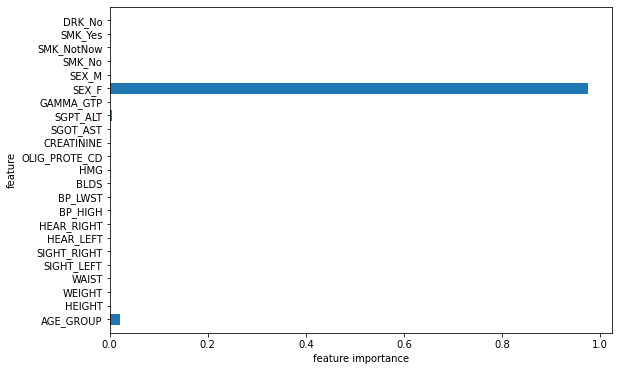

In [149]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[:23])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[:23])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(tree)

In [150]:
# 랜덤포레스트의 변수 중요도
result = forest.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.03967571 0.06764332 0.04611662 0.06769345 0.04210323 0.04100785
 0.00368115 0.00416486 0.06240787 0.05963685 0.06676051 0.08739049
 0.00826902 0.05860553 0.05857113 0.07248915 0.07958668 0.07864895
 0.02296534 0.00788059 0.00776936 0.00833463 0.00859772]


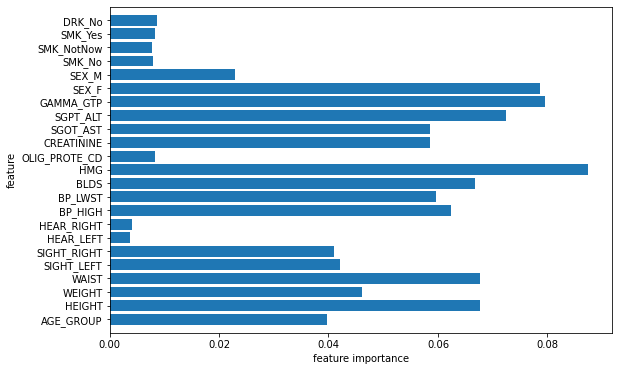

In [151]:
# 단일 의사결정나무보다 많은 변수들이 사용됨
plot_feature_importances_health(forest)

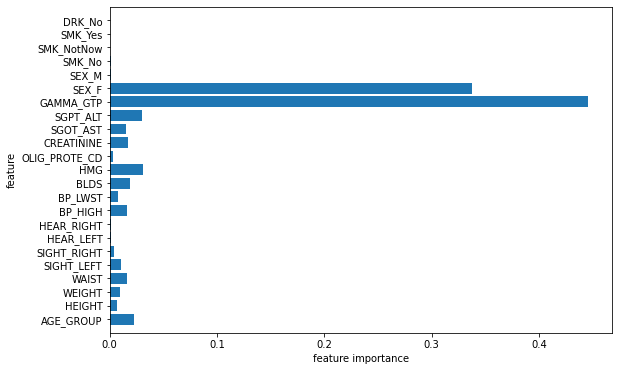

In [153]:
#그래디언트 부스팅의 변수 중요도
plot_feature_importances_health(gbrt)